In [1]:
from astroquery.skyview import SkyView
import astropy.units as u

In [2]:
m42_images = SkyView.get_images(position='M42', survey=['2MASS-K'],
                                pixels=2000)

In [3]:
m42 = m42_images[0]

In [4]:
from astropy.wcs import WCS
wcs = WCS(m42[0].header)

In [5]:
%matplotlib nbagg
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


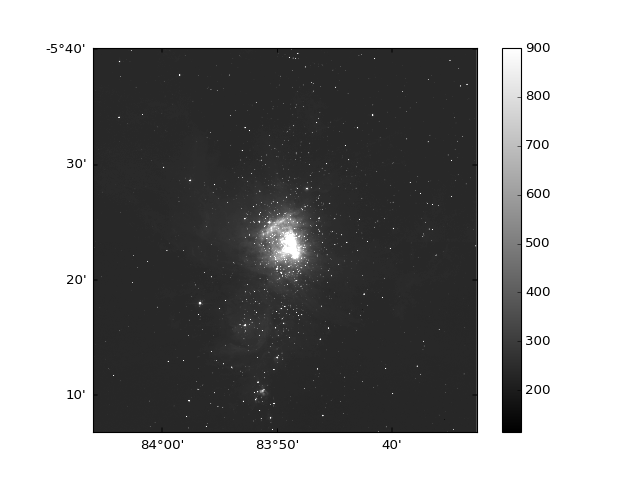

In [19]:
fig, ax = plt.subplots(subplot_kw={'projection':wcs})
im = ax.imshow(m42[0].data, cmap='gray', vmax=900)
plt.colorbar(im)

In [22]:
from astroquery.irsa import Irsa

In [47]:
Irsa.ROW_LIMIT = 1e6

In [61]:
table = Irsa.query_region("m42", catalog="fp_psc", spatial="Cone",
                          radius=15*u.arcmin)

In [62]:
table2 = table[table['h_m']< 12.]

In [63]:
plt.scatter?

<IPython.core.display.Javascript object>


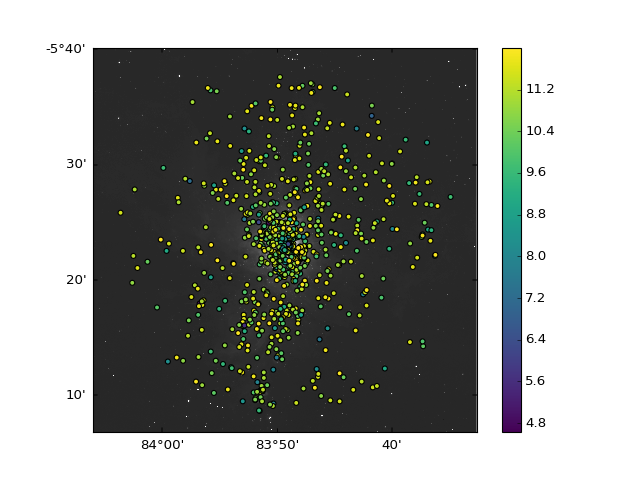

In [67]:
fig, ax = plt.subplots(subplot_kw={'projection':wcs})
im = ax.imshow(m42[0].data, cmap='gray', vmax=900, interpolation='none')

ax.set_autoscale_on(False)

sc = plt.scatter(table2['ra'], table2['dec'], c=table2['h_m'],
                 cmap='viridis', transform=ax.get_transform('fk5'))
plt.colorbar(sc)